<a href="https://colab.research.google.com/github/laribar/TechChallenge2/blob/main/bitcoinprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [254]:
# Substitua os dados pelos corretos do seu repositório
url = 'https://raw.githubusercontent.com/laribar/bitcoinprediction/refs/heads/main/Bitcoin_30_11_2024-31_01_2025_historical_data_coinmarketcap.csv'

In [255]:
# Ler o CSV com o delimitador especificado
df = pd.read_csv(url, delimiter=';')  # Use ',' se o CSV for separado por vírgulas

# Exibir as primeiras cinco linhas do DataFrame
print(df.tail())

                    timeOpen                 timeClose  \
55  2024-12-06T00:00:00.000Z  2024-12-06T23:59:59.999Z   
56  2024-12-05T00:00:00.000Z  2024-12-05T23:59:59.999Z   
57  2024-12-04T00:00:00.000Z  2024-12-04T23:59:59.999Z   
58  2024-12-03T00:00:00.000Z  2024-12-03T23:59:59.999Z   
59  2024-12-02T00:00:00.000Z  2024-12-02T23:59:59.999Z   

                    timeHigh                   timeLow  name          open  \
55  2024-12-06T20:43:00.000Z  2024-12-06T00:07:00.000Z  2781  97074.224832   
56  2024-12-05T03:09:00.000Z  2024-12-05T22:29:00.000Z  2781  98741.539382   
57  2024-12-04T20:52:00.000Z  2024-12-04T16:53:00.000Z  2781  95988.528712   
58  2024-12-03T02:42:00.000Z  2024-12-03T14:36:00.000Z  2781  95854.597434   
59  2024-12-02T01:32:00.000Z  2024-12-02T18:00:00.000Z  2781  97276.010117   

             high           low         close        volume     marketCap  \
55  102039.881796  96514.876082  99920.714730  9.453477e+10  1.977631e+12   
56  103900.472147  91998.781

In [256]:
# Renomear a coluna 'último' para 'fechamento'
df.rename(columns={'close': 'Fechamento'}, inplace=True)

# Visualizar as primeiras linhas após renomear as colunas
print("\nColunas após a renomeação:")
print(df.columns)

# Exibir as primeiras linhas do DataFrame para confirmar a alteração
print(df.head())


Colunas após a renomeação:
Index(['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'name', 'open', 'high',
       'low', 'Fechamento', 'volume', 'marketCap', 'timestamp'],
      dtype='object')
                   timeOpen                 timeClose  \
0  2025-01-30T00:00:00.000Z  2025-01-30T23:59:59.999Z   
1  2025-01-29T00:00:00.000Z  2025-01-29T23:59:59.999Z   
2  2025-01-28T00:00:00.000Z  2025-01-28T23:59:59.999Z   
3  2025-01-27T00:00:00.000Z  2025-01-27T23:59:59.999Z   
4  2025-01-26T00:00:00.000Z  2025-01-26T23:59:59.999Z   

                   timeHigh                   timeLow  name           open  \
0  2025-01-30T15:13:00.000Z  2025-01-30T00:32:00.000Z  2781  103709.338799   
1  2025-01-29T20:34:00.000Z  2025-01-29T00:01:00.000Z  2781  101317.527253   
2  2025-01-28T15:32:00.000Z  2025-01-28T22:01:00.000Z  2781  102095.417583   
3  2025-01-27T00:11:00.000Z  2025-01-27T07:31:00.000Z  2781  102680.303591   
4  2025-01-26T04:27:00.000Z  2025-01-26T23:56:00.000Z  2781  104713.21323

In [257]:
# Converter coluna timeOpen para tipo datetime
df['Data'] = pd.to_datetime(df['timeOpen']).dt.date
# Definindo a 'data' como índice do DataFrame
df.set_index('Data', inplace=True)
# Exibir as primeiras linhas para verificar se a operação foi bem-sucedida
print(df.head())

                            timeOpen                 timeClose  \
Data                                                             
2025-01-30  2025-01-30T00:00:00.000Z  2025-01-30T23:59:59.999Z   
2025-01-29  2025-01-29T00:00:00.000Z  2025-01-29T23:59:59.999Z   
2025-01-28  2025-01-28T00:00:00.000Z  2025-01-28T23:59:59.999Z   
2025-01-27  2025-01-27T00:00:00.000Z  2025-01-27T23:59:59.999Z   
2025-01-26  2025-01-26T00:00:00.000Z  2025-01-26T23:59:59.999Z   

                            timeHigh                   timeLow  name  \
Data                                                                   
2025-01-30  2025-01-30T15:13:00.000Z  2025-01-30T00:32:00.000Z  2781   
2025-01-29  2025-01-29T20:34:00.000Z  2025-01-29T00:01:00.000Z  2781   
2025-01-28  2025-01-28T15:32:00.000Z  2025-01-28T22:01:00.000Z  2781   
2025-01-27  2025-01-27T00:11:00.000Z  2025-01-27T07:31:00.000Z  2781   
2025-01-26  2025-01-26T04:27:00.000Z  2025-01-26T23:56:00.000Z  2781   

                     open       

In [258]:
df.describe()


,name,open,high,low,Fechamento,volume,marketCap
count,60.0,60.000000,60.000000,60.000000,60.000000,6.000000e+01,6.000000e+01
mean,2781.0,98971.957747,100994.491302,96898.850618,99088.581257,6.073126e+10,1.962371e+12
std,0.0,3797.185898,4132.200142,3889.234158,3868.868476,2.796377e+10,7.686465e+10
min,2781.0,92494.491506,94903.323896,89260.100189,92484.036972,1.886089e+10,1.832169e+12
25%,2781.0,95817.191722,97358.364713,93808.160561,95847.855374,4.400059e+10,1.896980e+12
50%,2781.0,98495.433910,100739.411729,96464.082566,98722.312476,5.399098e+10,1.954004e+12
75%,2781.0,101601.723775,104791.406985,99972.064474,102032.018104,7.393173e+10,2.021847e+12
max,2781.0,106147.295260,109114.884834,105291.737868,106146.263007,1.492189e+11,2.102916e+12


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 2025-01-30 to 2024-12-02
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timeOpen    60 non-null     object 
 1   timeClose   60 non-null     object 
 2   timeHigh    60 non-null     object 
 3   timeLow     60 non-null     object 
 4   name        60 non-null     int64  
 5   open        60 non-null     float64
 6   high        60 non-null     float64
 7   low         60 non-null     float64
 8   Fechamento  60 non-null     float64
 9   volume      60 non-null     float64
 10  marketCap   60 non-null     float64
 11  timestamp   60 non-null     object 
dtypes: float64(6), int64(1), object(5)
memory usage: 6.1+ KB


In [260]:
# Garantir que estamos projetando após o último ponto do histórico
last_date = df.index[-1]  # Última data conhecida no dataset histórico

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 2025-01-30 to 2024-12-02
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   timeOpen    60 non-null     object             
 1   timeClose   60 non-null     datetime64[ns, UTC]
 2   timeHigh    60 non-null     object             
 3   timeLow     60 non-null     object             
 4   name        60 non-null     int64              
 5   open        60 non-null     float64            
 6   high        60 non-null     float64            
 7   low         60 non-null     float64            
 8   Fechamento  60 non-null     float64            
 9   volume      60 non-null     float64            
 10  marketCap   60 non-null     float64            
 11  timestamp   60 non-null     object             
dtypes: datetime64[ns, UTC](1), float64(6), int64(1), object(4)
memory usage: 6.1+ KB


In [264]:
# Definir timeClose como o índice
df.set_index('timeClose', inplace=True)


In [265]:
# Conjunto de recursos e alvo - supondo que preço de fechamento é alvo
X = np.arange(len(df)).reshape(-1, 1)  # Super simples, usando uma contagem como referência temporal
y = df['Fechamento'].values  # Assumindo 'close' como a coluna de preços de fechamento

# Dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [266]:
# Instanciar o modelo
model = LinearRegression()

# Treinamento
model.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = model.predict(X_test)

In [267]:
# Criação de novos índices temporais para previsão
X_future = np.arange(len(df), len(df) + 5).reshape(-1, 1)

# Previsões usando o modelo treinado
future_pred = model.predict(X_future)

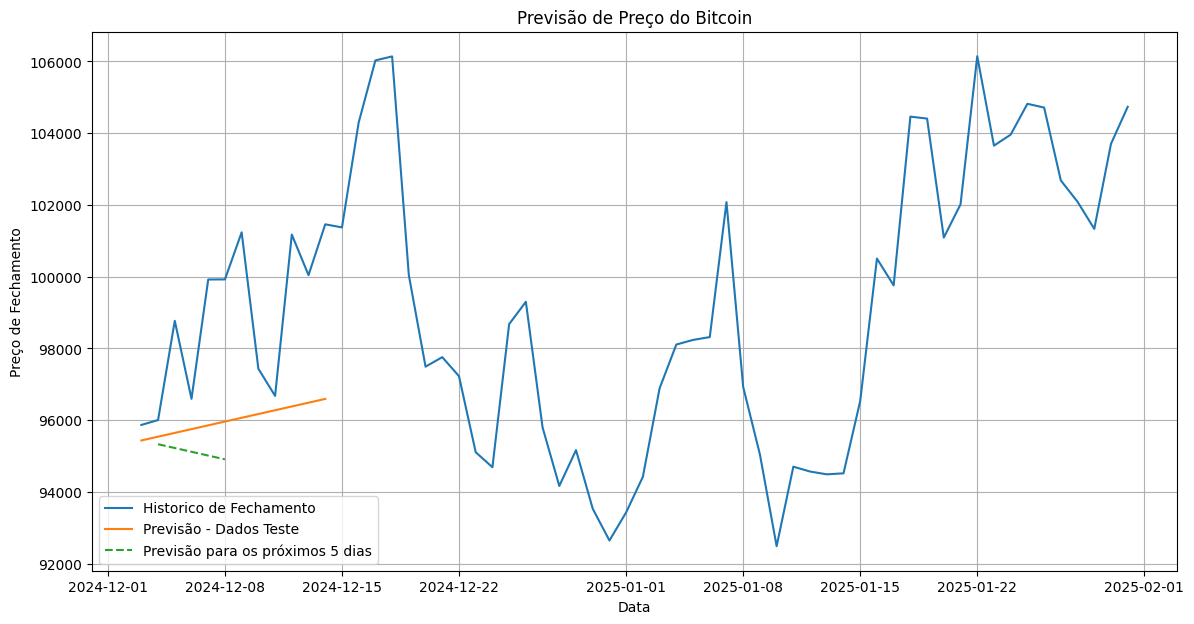

In [268]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, y, label='Historico de Fechamento')
plt.plot(df.index[-len(y_test):], y_pred, label='Previsão - Dados Teste')

# Criando índice para dias futuros
future_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=5)

# Plotando as previsões futuras
plt.plot(future_dates, future_pred, label='Previsão para os próximos 5 dias', linestyle='--')

plt.title('Previsão de Preço do Bitcoin')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)
plt.show()

In [269]:

# Instanciar o modelo Random Forest treinado anteriormente
rf = RandomForestRegressor(random_state=42)

# Caminho correto considerando que rf foi usado anteriormente:
rf.fit(X_train, y_train)

# Então vamos com previsões para novos dados
best_rf = rf  # Use rf diretamente se best_rf não estiver definido

In [270]:
df['Lag1'] = df['Fechamento'].shift(1)
df['Lag2'] = df['Fechamento'].shift(2)
df['Lag3'] = df['Fechamento'].shift(3)
df.dropna(inplace=True)  # Sem NaN devem ser inclusos no treino

In [271]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Dados para treino
X = df[['Lag1', 'Lag2', 'Lag3']]
y = df['Fechamento']

# Dividir em treino e teste se desejado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Ajustar e treinar o modelo de random forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [272]:
last_known_values = df[['Lag1', 'Lag2', 'Lag3']].iloc[-1].values
future_predictions = []  # Student fix will fill this list in a temporal loop

for _ in range(future_steps):
    input_features = last_known_values.reshape(1, -1)
    predicted_value = rf.predict(input_features)[0]
    future_predictions.append(predicted_value)
    last_known_values = np.roll(last_known_values, shift=1)
    last_known_values[0] = predicted_value

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/

Última data do histórico: 2024-12-02
Datas futuras: [Timestamp('2024-12-03 00:00:00'), Timestamp('2024-12-04 00:00:00'), Timestamp('2024-12-05 00:00:00'), Timestamp('2024-12-06 00:00:00'), Timestamp('2024-12-07 00:00:00'), Timestamp('2024-12-08 00:00:00'), Timestamp('2024-12-09 00:00:00'), Timestamp('2024-12-10 00:00:00'), Timestamp('2024-12-11 00:00:00'), Timestamp('2024-12-12 00:00:00')]


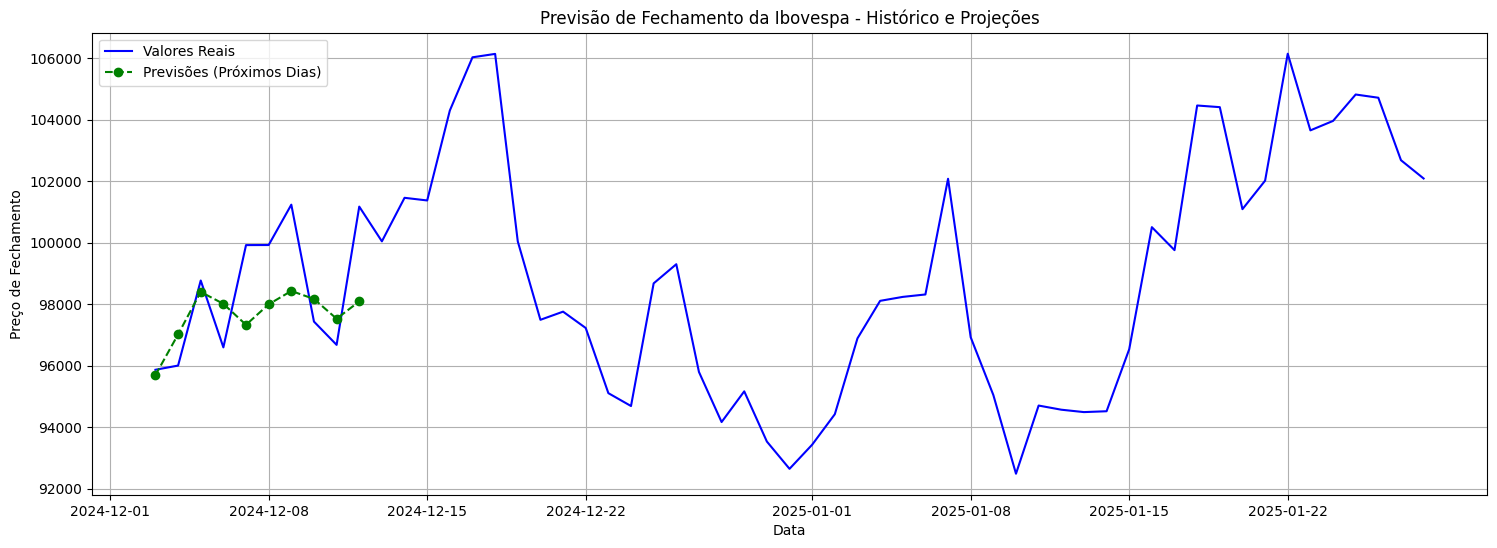

In [273]:
# Gerar datas futuras para as previsões (alinear "index")
future_dates = [last_date + DateOffset(days=x) for x in range(1, len(future_predictions) + 1)]

# DEBUG: Verificar alinhamento
print("Última data do histórico:", last_date)
print("Datas futuras:", future_dates)

# Plot do gráfico corrigido
plt.figure(figsize=(18, 6))

# Linha dos valores reais (histórico)
plt.plot(df.index, df['Fechamento'], label='Valores Reais', color='blue')

# Previsão começa em future_dates (agora alinhada com index correto)
plt.plot(future_dates, future_predictions, label='Previsões (Próximos Dias)',
         color='green', linestyle='--', marker='o')

# Adicionando informações ao gráfico
plt.title('Previsão de Fechamento da Ibovespa - Histórico e Projeções')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)

# Mostrar o gráfico corrigido
plt.show()

In [274]:
from sklearn.model_selection import train_test_split

# Separar as features (lags) e os valores-alvo (Fechamento)
X = df[['Lag1', 'Lag2', 'Lag3']]  # Supondo lags já calculados
y = df['Fechamento']

# Dividir treino e teste (exemplo: 80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [275]:
from sklearn.ensemble import RandomForestRegressor

# Instanciar o modelo e treinar
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [276]:
# Fazer previsões no conjunto de teste
y_pred = rf.predict(X_test)

In [277]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# R² Score
r2 = r2_score(y_test, y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

R² Score: -0.7519378925221147
RMSE: 2711.821741372055


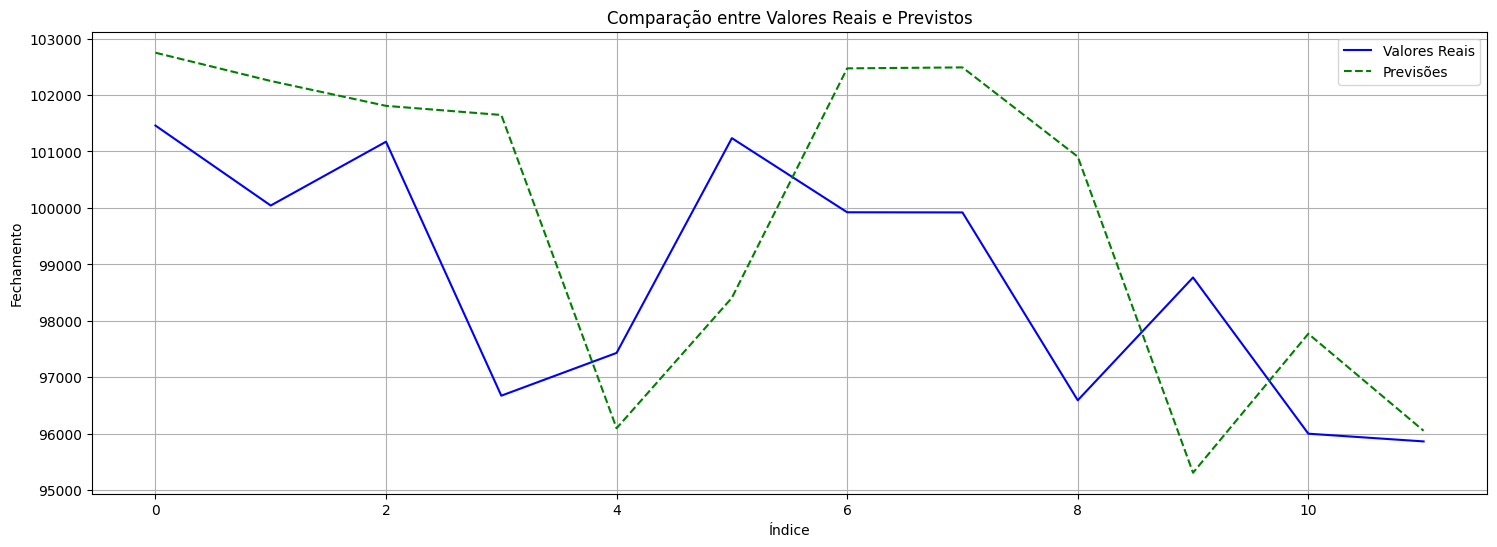

In [278]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

# Plotar valores reais
plt.plot(y_test.values, label='Valores Reais', color='blue')

# Plotar valores previstos
plt.plot(y_pred, label='Previsões', color='green', linestyle='--')

# Ajustes do gráfico
plt.title('Comparação entre Valores Reais e Previstos')
plt.xlabel('Índice')
plt.ylabel('Fechamento')
plt.legend()
plt.grid(True)

plt.show()

In [279]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [280]:
df['Lag4'] = df['Fechamento'].shift(4)
df['Lag5'] = df['Fechamento'].shift(5)

In [281]:
from sklearn.ensemble import RandomForestRegressor

# Supondo que X e y já estão prontos
# X contém as colunas de lag (ex.: Lag1, Lag2, Lag3)
# y é o Preço de Fechamento
rf = RandomForestRegressor(n_estimators=200)

# Treinamento do modelo
rf.fit(X_train, y_train)  # Passe os dados de treino aqui

RandomForestRegressor(n_estimators=200)

In [282]:
# Importar biblioteca
from sklearn.model_selection import train_test_split

# Criar features (lags) e target (Fechamento)
X = df[['Lag1', 'Lag2', 'Lag3']]  # Features definidas
y = df['Fechamento']  # Target

# Dividir em treino e teste (80% treino, 20% teste, sem embaralhar = tempo contínuo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Instanciar o modelo
rf = RandomForestRegressor(n_estimators=200)

# Treinar o modelo
rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = rf.predict(X_test)

# Avaliação do modelo
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculando métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)
print("RMSE:", rmse)


R² Score: -0.8637456246271258
RMSE: 2797.0169852465033


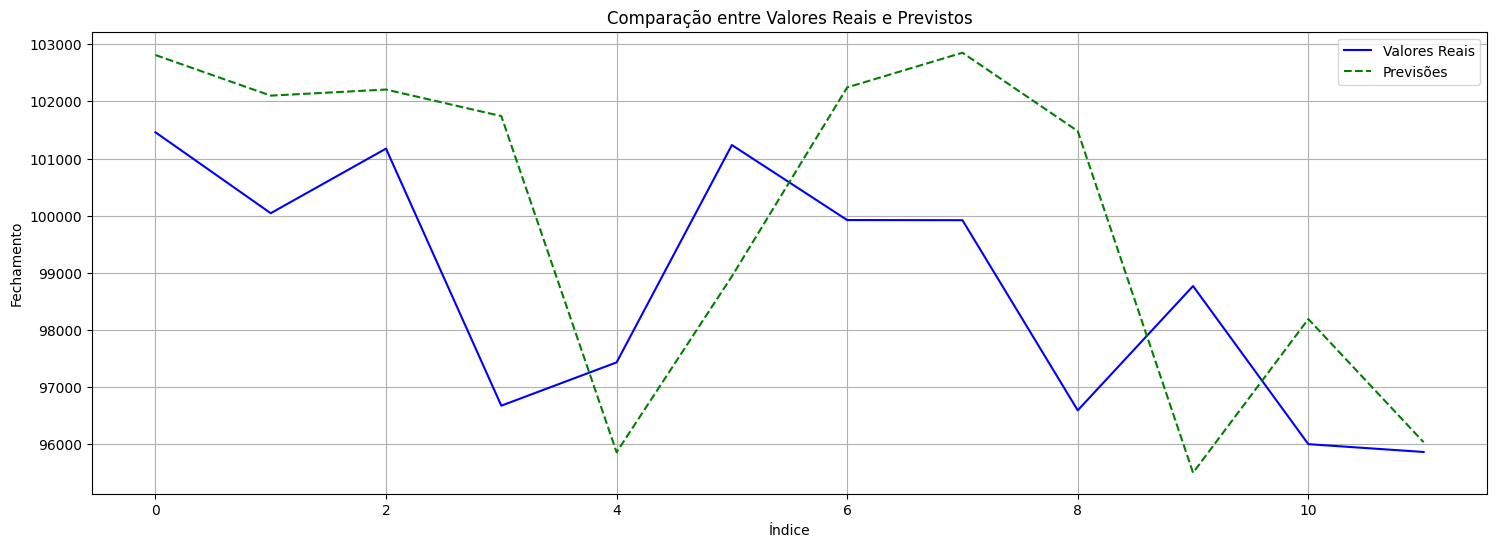

In [283]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

# Plotar valores reais
plt.plot(y_test.values, label='Valores Reais', color='blue')

# Plotar valores previstos
plt.plot(y_pred, label='Previsões', color='green', linestyle='--')

# Ajustes do gráfico
plt.title('Comparação entre Valores Reais e Previstos')
plt.xlabel('Índice')
plt.ylabel('Fechamento')
plt.legend()
plt.grid(True)

plt.show()

In [284]:
# Assumindo que o DataFrame 'df' já existe e possui uma coluna 'Fechamento'

max_lag = 10  # Quantas lags você deseja adicionar

for i in range(1, max_lag + 1):
    df[f'Lag{i}'] = df['Fechamento'].shift(i)

# Remover NaN criados pelas operações de shift
df.dropna(inplace=True)


In [285]:
# Construir X com base nas novas features (lags).
X = df[[f'Lag{i}' for i in range(1, max_lag + 1)]]
# Os valores-alvo, como antes
y = df['Fechamento']

# Separar dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [286]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [287]:
rf = RandomForestRegressor(n_estimators=200, max_depth=5)

In [288]:
from sklearn.model_selection import GridSearchCV

# Definir valores a explorar para parâmetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, None]
}

# Grid Search
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Melhor conjunto de parâmetros
print(grid_search.best_params_)

{'max_depth': None, 'n_estimators': 200}


In [289]:
# Pegar os melhores parâmetros do Grid Search
best_params = grid_search.best_params_

# Criar o modelo com os melhores parâmetros encontrados
optimized_rf = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])

# Treinar o modelo com os dados escalonados
optimized_rf.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=200)

In [290]:
# Fazer previsões no conjunto de teste
y_pred = optimized_rf.predict(X_test_scaled)

In [291]:
# Importar métricas
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calcular o RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Calcular o R²
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

RMSE: 2582.0034611324113
R²: -0.6737092449938744


In [292]:
# Criar previsões para os próximos 5 dias
forecast_input = X_test_scaled[-1:].copy()  # O último ponto de teste como entrada inicial
future_predictions = []

for _ in range(5):  # Prever os próximos 5 passos
    prediction = optimized_rf.predict(forecast_input)[0]
    future_predictions.append(prediction)  # Salvar previsão

    # Atualizar forecast_input com a nova previsão
    forecast_input = np.roll(forecast_input, -1)  # Desloca os valores
    forecast_input[0, -1] = prediction  # Adicionar a previsão

# Criar as datas futuras para as previsões
import pandas as pd
from pandas.tseries.offsets import DateOffset

# Supondo que o índice `y_test` tem datetime
last_date = y_test.index[-1]  # Última data
future_dates = [last_date + DateOffset(days=i) for i in range(1, 6)]

# Criar uma Série com as previsões futuras
future_series = pd.Series(future_predictions, index=future_dates)

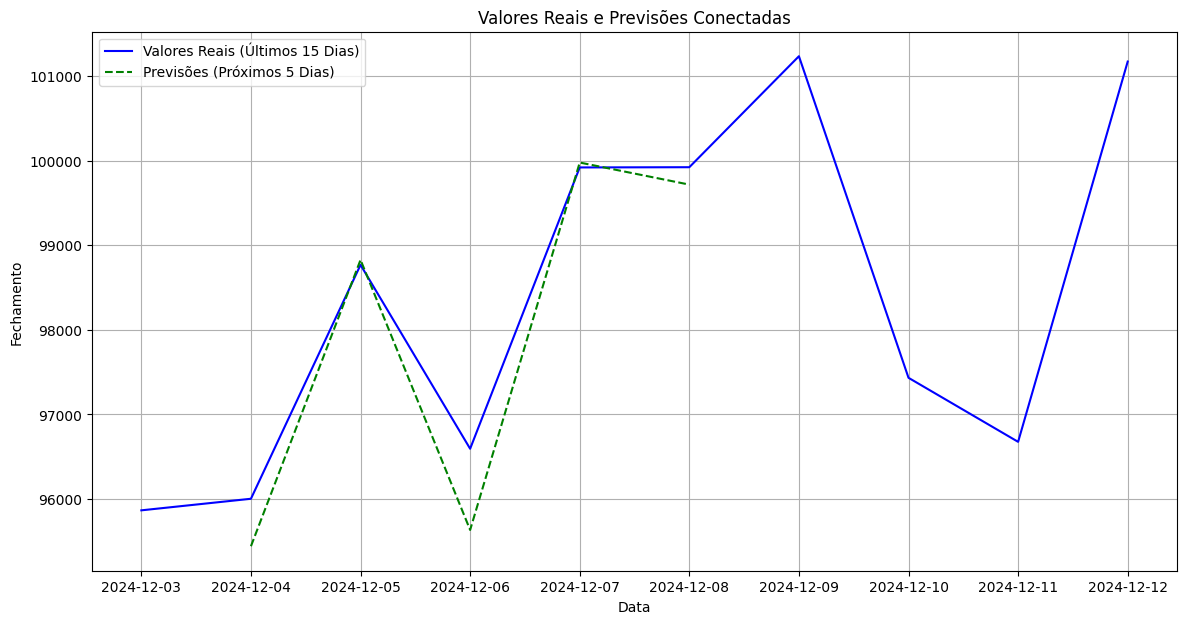

In [293]:
import matplotlib.pyplot as plt

# Definir os últimos 15 dias reais
last_15_real = y_test[-15:]  # Últimos 15 valores reais

# Plotar
plt.figure(figsize=(14, 7))

# Valores Reais
plt.plot(last_15_real.index, last_15_real, label='Valores Reais (Últimos 15 Dias)', color='blue')

# Valores Previstos
plt.plot(future_series.index, future_series, label='Previsões (Próximos 5 Dias)', color='green', linestyle='--')

# Customizar
plt.title('Valores Reais e Previsões Conectadas')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.legend()
plt.grid(True)

# Mostrar o gráfico
plt.show()